In [2]:
# import zipfile

# zip_file_paths = ['trainImages.zip', 'validationImages.zip']

# for path in zip_file_paths:
#     name = str(path)
#     with zipfile.ZipFile(path, "r") as zip_ref:
#         zip_ref.extractall(f'unzipped/{name.split(".")[0]}')

In [3]:
import pandas as pd

df_validation = pd.read_csv("/Users/bilensezgin/Documents/Courses/unzipped/validationImages/labels/detections.csv")
df_validation.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,xclick,/m/0cmf2,1,0.022673,0.964201,0.071038,0.800546,0,0,0,0,0
1,000595fe6fee6369,xclick,/m/02wbm,1,0.000000,1.000000,0.000000,1.000000,0,0,1,0,0
2,000595fe6fee6369,xclick,/m/02xwb,1,0.141384,0.179676,0.676275,0.731707,0,0,0,0,0
3,000595fe6fee6369,xclick,/m/02xwb,1,0.213549,0.253314,0.299335,0.354767,1,0,0,0,0
4,000595fe6fee6369,xclick,/m/02xwb,1,0.232695,0.288660,0.490022,0.545455,1,0,0,0,0


In [4]:
df_train= pd.read_csv("/Users/bilensezgin/Documents/Courses/unzipped/trainImages/labels/detections.csv")
df_train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938


In [5]:
len(df_train)

14610229

In [6]:
data_path_validation = "/Users/bilensezgin/Documents/Courses/unzipped/validationImages/data/*.jpg"
data_path_train = "/Users/bilensezgin/Documents/Courses/unzipped/trainImages/data/*.jpg"

In [7]:
import glob
counter = 0
img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

517


In [8]:
counter = 0
img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

9


In [9]:
import glob

train_list_ids = []
validation_list_ids = []

def get_ids(split, print_this, to_append_list):
    start = 0
    end = 0 
    if split == data_path_train:
        start,end = 26,42
    elif split == data_path_validation:
        start,end = 31, 47
    else:
        raise Exception("Invalid Parameter")
    folder = split
    img_paths = glob.glob(folder)
    img_ids = to_append_list
    
    for i in img_paths:
        id = i[start:end]
        img_ids.append(id)
        
    print(len(img_ids))
    print(print_this)
    

In [10]:
get_ids(data_path_train, "task finished", train_list_ids)

517
task finished


In [11]:
train_list_ids[0]

'ts/Courses/unzip'

In [12]:
get_ids(data_path_validation, "task finished", validation_list_ids)

9
task finished


In [13]:
train_classes_df = pd.read_csv("/Users/bilensezgin/Documents/Courses/unzipped/trainImages/metadata/classes.csv", names=["className", "Object"])
validation_classes_df = pd.read_csv("/Users/bilensezgin/Documents/Courses/unzipped/validationImages/metadata/classes.csv", names=["className", "Object"])

In [14]:
train_identifier = train_classes_df[train_classes_df["Object"]=="Plastic bag"]
validation_identifier = validation_classes_df[validation_classes_df["Object"] == "Plastic bag"]

print(f"Train identifier: {train_identifier}")
print(f"Validation indentifier: {validation_identifier}")

Train identifier:      className       Object
327  /m/05gqfk  Plastic bag
Validation indentifier:      className       Object
327  /m/05gqfk  Plastic bag


In [15]:
import random

def random_row_from_df(split):
    dataframe = ""
    
    if split == "train":
        dataframe, ids_to_check = df_train, train_list_ids
    elif split == "validation":
        dataframe, ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("Invalid parameter, must be train or validation")
    
    img_ids_len = len(ids_to_check)
    rand = random.randint(0,img_ids_len-1)
    id = ids_to_check[rand]
    print(id)
    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == "/m/05gqfk")]
    print(r) 

In [16]:
random_row_from_df("train")

ts/Courses/unzip
Empty DataFrame
Columns: [ImageID, Source, LabelName, Confidence, XMin, XMax, YMin, YMax, IsOccluded, IsTruncated, IsGroupOf, IsDepiction, IsInside, XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y]
Index: []

[0 rows x 21 columns]


In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image

validation_images_path = "/Users/bilensezgin/Documents/Courses/unzipped/validationImages/data/*.jpg"
train_images_path = "/Users/bilensezgin/Documents/Courses/unzipped/trainImages/data/*.jpg"

def visulize_random_image(split):
    split_path = train_images_path if split == "train" else validation_images_path if split == "validation" else 0
    if split_path == 0:
        raise Exception("Invalid input parameter, must be train or validation")
    images_folder = split_path
    images_paths = glob.glob(images_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images-1)
    random_image = images_paths[random_int]
    img = mpimg.imread(random_image)
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.imshow(img)
    plt.show()

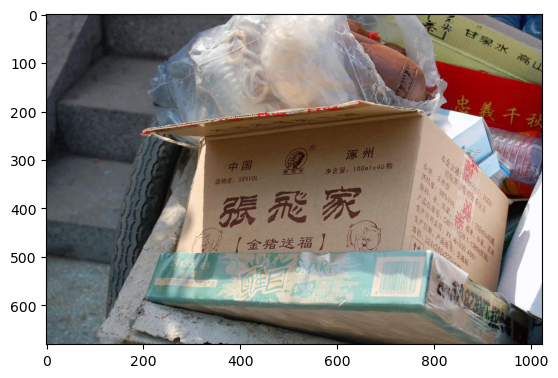

In [18]:
visulize_random_image("train")